In [1]:
%cd ~/REVIVAL2

/disk2/fli/REVIVAL2


In [2]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

from REVIVAL.util import get_file_name

%matplotlib inline

/disk2/fli/miniconda3/envs/REVIVAL/lib/python3.11/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [3]:
# merge all trpb datasets
all_trpb = []
parlq = []
rma = []
for f in glob("data/meta/*.csv"):
    df = pd.read_csv(f)
    df["Library"] = get_file_name(f)
    common_col = ["Library", "AAs", "fitness", "n_mut"]
    if "scope" in f:
        continue
    elif "TrpB" in f:
        df = df[common_col].copy()
        all_trpb.append(df)
    elif "ParLQ" in f:
        df = df[common_col + ["selectivity"]].copy()
        parlq.append(df)
    elif "Rma" in f:
        df = df[common_col + ["selectivity"]].copy()
        rma.append(df)
all_trpb = pd.concat(all_trpb)
all_parlq = pd.concat(parlq)
all_rma = pd.concat(rma)

In [4]:
len(all_trpb), len(all_parlq), len(all_rma)

(2478, 1218, 300)

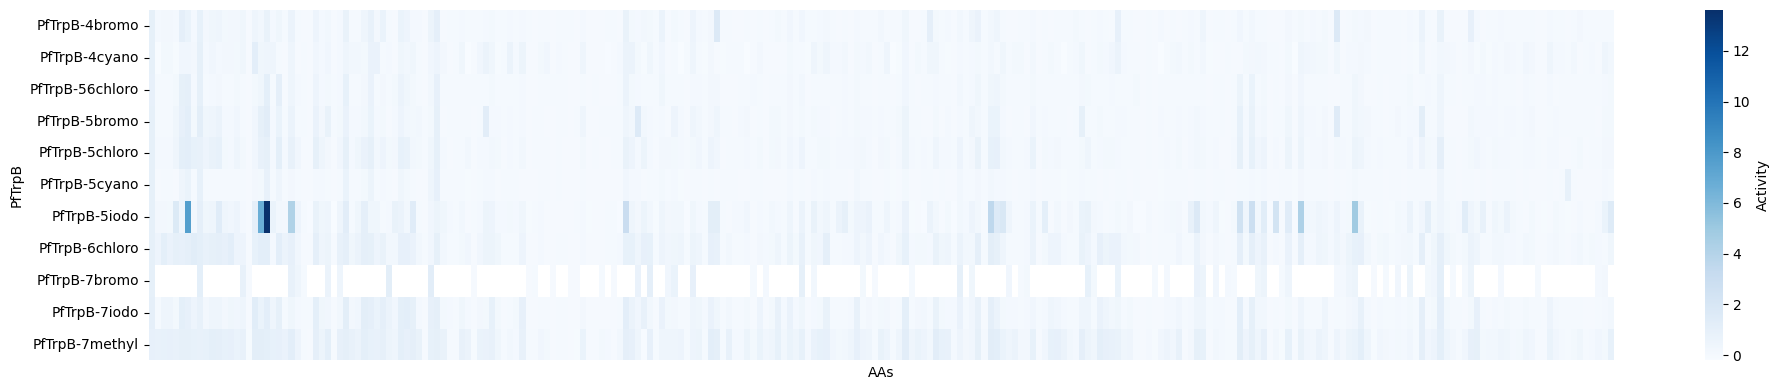

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram

# Assuming 'all_parlq' contains 'AAs' and 'n_mut' columns

# Step 1: Sort or Cluster the AAs based on n_mut
# If you want to sort the AAs by 'n_mut' (assuming 'n_mut' is a column in 'all_parlq'):
sorted_AAs = all_trpb.groupby('AAs')['n_mut'].mean().sort_values().index.tolist()

# Step 2: Pivot the DataFrame based on sorted AAs
heatmap_data = all_trpb.pivot_table(index="Library", columns="AAs", values="fitness", aggfunc="mean")

# Reorder the columns based on sorted AAs
heatmap_data = heatmap_data[sorted_AAs]

# Step 3: Create the heatmap
plt.figure(figsize=(20, 4))
sns.heatmap(
    heatmap_data,
    cmap="Blues",  # A better colormap than "hot"
    annot=False,  # Disable annotations inside the cells
    linewidths=0,  # Add a line between cells for better separation
    linecolor="gray",  # Color of the lines between cells
    cbar_kws={'label': 'Activity'},  # Add a label to the color bar
    xticklabels=False,  # Show x-axis labels
    yticklabels=True,  # Show y-axis labels
    # square=True,  # Make the heatmap square (optional)
)

# Adjust the labels and title
# plt.title("Heatmap of Activity vs AAs for Different Libraries", fontsize=24)
# plt.xlabel("Amino Acids (AAs)", fontsize=18)
plt.ylabel("PfTrpB")
# save
plt.savefig("figs/libs/trpb.svg", bbox_inches="tight", dpi=300)

# Display the plot
plt.tight_layout()
plt.show()


In [9]:
all_parlq

,Library,AAs,fitness,n_mut,selectivity
0,ParLQ,ACSEG,2.373278,5,0.064151
1,ParLQ,ACSEK,3.870042,5,0.057524
2,ParLQ,ACSEP,1.795902,5,0.126367
3,ParLQ,ACSEQ,3.465058,5,0.055456
4,ParLQ,ACSET,10.392247,5,0.267301
...,...,...,...,...,...
86,ParLQ-h,SKFDY,24.140106,5,2.211331
87,ParLQ-h,SKMDY,12.416794,5,0.696691
88,ParLQ-h,SYFDY,19.850481,4,1.362856
89,ParLQ-h,SYMDY,8.608286,4,0.414261


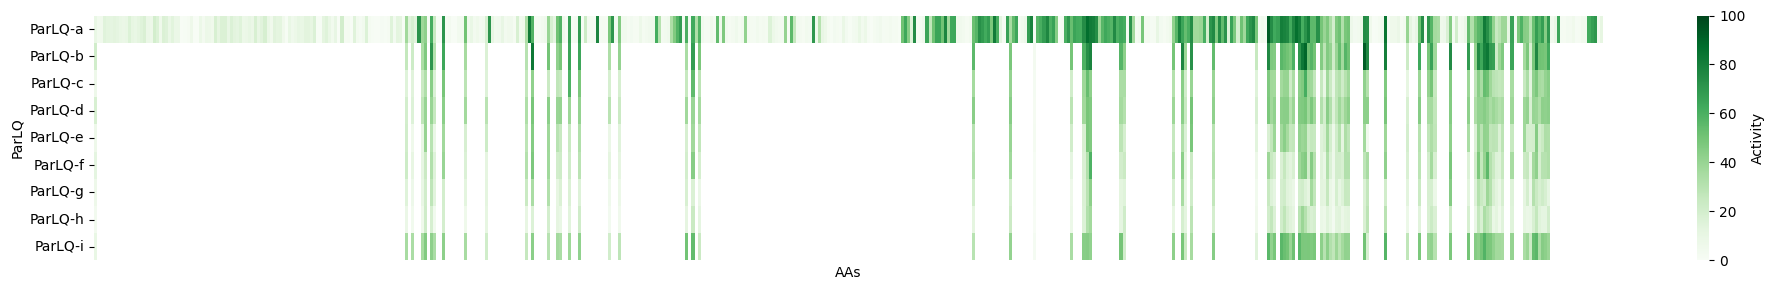

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram

# Assuming 'all_parlq' contains 'AAs' and 'n_mut' columns
# rename parlq to parlq-a
all_parlq.loc[all_parlq["Library"] == "ParLQ", "Library"] = "ParLQ-a"

# Step 1: Sort or Cluster the AAs based on n_mut
# If you want to sort the AAs by 'n_mut' (assuming 'n_mut' is a column in 'all_parlq'):
sorted_AAs = all_parlq.groupby('AAs')['n_mut'].mean().sort_values().index.tolist()

# Step 2: Pivot the DataFrame based on sorted AAs
heatmap_data = all_parlq.pivot_table(index="Library", columns="AAs", values="fitness", aggfunc="mean")

# Reorder the columns based on sorted AAs
heatmap_data = heatmap_data[sorted_AAs]

# Step 3: Create the heatmap
plt.figure(figsize=(20, 3))
sns.heatmap(
    heatmap_data,
    cmap="Greens",  # A better colormap than "hot"
    annot=False,  # Disable annotations inside the cells
    linewidths=0,  # Add a line between cells for better separation
    linecolor="gray",  # Color of the lines between cells
    cbar_kws={'label': 'Activity'},  # Add a label to the color bar
    xticklabels=False,  # Show x-axis labels
    yticklabels=True,  # Show y-axis labels
    vmin=0,
    vmax=100,
    # square=True,  # Make the heatmap square (optional)
)

# Adjust the labels and title
# plt.title("Heatmap of Activity vs AAs for Different Libraries", fontsize=24)
# plt.xlabel("Amino Acids (AAs)", fontsize=18)
plt.ylabel("ParLQ")
# save
plt.savefig("figs/libs/parlq_fit.svg", bbox_inches="tight", dpi=300)
# Display the plot
plt.tight_layout()
plt.show()


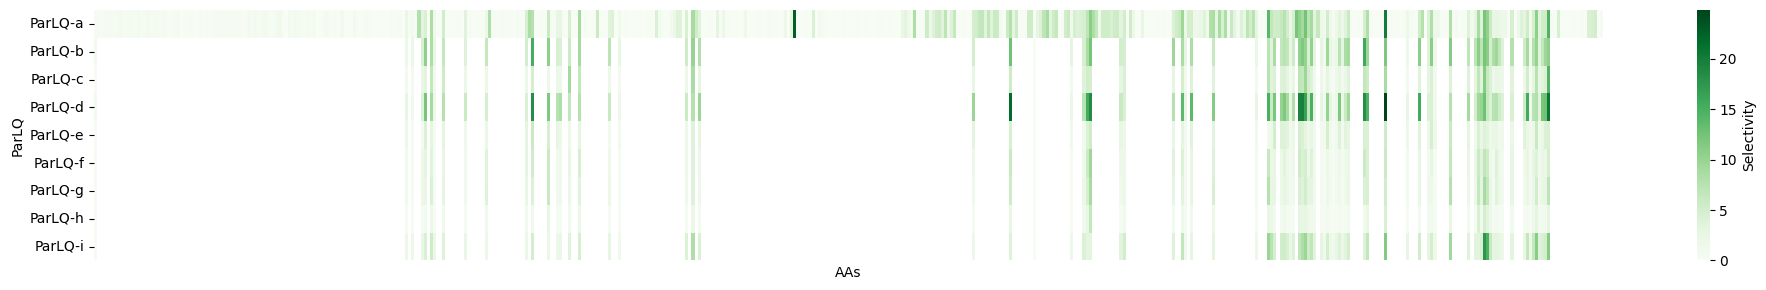

In [17]:

# Step 2: Pivot the DataFrame based on sorted AAs
heatmap_data = all_parlq.pivot_table(index="Library", columns="AAs", values="selectivity", aggfunc="mean")

# Reorder the columns based on sorted AAs
heatmap_data = heatmap_data[sorted_AAs]

# Step 3: Create the heatmap
plt.figure(figsize=(20, 3))
sns.heatmap(
    heatmap_data,
    cmap="Greens",  # A better colormap than "hot"
    annot=False,  # Disable annotations inside the cells
    linewidths=0,  # Add a line between cells for better separation
    linecolor="gray",  # Color of the lines between cells
    cbar_kws={'label': 'Selectivity'},  # Add a label to the color bar
    xticklabels=False,  # Show x-axis labels
    yticklabels=True,  # Show y-axis labels
    vmin=0,
    # square=True,  # Make the heatmap square (optional)
)

# Adjust the labels and title
# plt.title("Heatmap of Activity vs AAs for Different Libraries", fontsize=24)
# plt.xlabel("Amino Acids (AAs)", fontsize=18)
plt.ylabel("ParLQ")
# save
plt.savefig("figs/libs/parlq_sele.svg", bbox_inches="tight", dpi=300)
# Display the plot
plt.tight_layout()
plt.show()

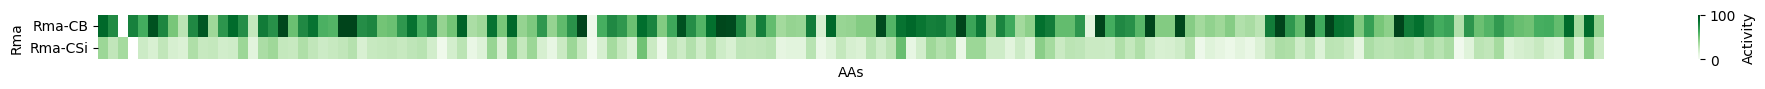

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram

# Assuming 'all_parlq' contains 'AAs' and 'n_mut' columns

# Step 1: Sort or Cluster the AAs based on n_mut
# If you want to sort the AAs by 'n_mut' (assuming 'n_mut' is a column in 'all_parlq'):
sorted_AAs = all_rma.groupby('AAs')['n_mut'].mean().sort_values().index.tolist()

# Step 2: Pivot the DataFrame based on sorted AAs
heatmap_data = all_rma.pivot_table(index="Library", columns="AAs", values="fitness", aggfunc="mean")

# Reorder the columns based on sorted AAs
heatmap_data = heatmap_data[sorted_AAs]

# Step 3: Create the heatmap
plt.figure(figsize=(20, 1))
sns.heatmap(
    heatmap_data,
    cmap="Greens",  # A better colormap than "hot"
    annot=False,  # Disable annotations inside the cells
    linewidths=0,  # Add a line between cells for better separation
    linecolor="gray",  # Color of the lines between cells
    cbar_kws={'label': 'Activity'},  # Add a label to the color bar
    xticklabels=False,  # Show x-axis labels
    yticklabels=True,  # Show y-axis labels
    vmin=0,
    vmax=100,
    # square=True,  # Make the heatmap square (optional)
)

# Adjust the labels and title
# plt.title("Heatmap of Activity vs AAs for Different Libraries", fontsize=24)
# plt.xlabel("Amino Acids (AAs)", fontsize=18)
plt.ylabel("Rma")
# save
plt.savefig("figs/libs/rma_fit.svg", bbox_inches="tight", dpi=300)

# Display the plot
plt.tight_layout()
plt.show()


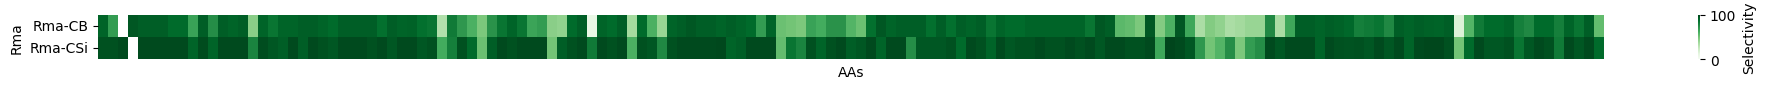

In [21]:

# Step 2: Pivot the DataFrame based on sorted AAs
heatmap_data = all_rma.pivot_table(index="Library", columns="AAs", values="selectivity", aggfunc="mean")

# Reorder the columns based on sorted AAs
heatmap_data = heatmap_data[sorted_AAs]

# Step 3: Create the heatmap
plt.figure(figsize=(20, 1))
sns.heatmap(
    heatmap_data,
    cmap="Greens",  # A better colormap than "hot"
    annot=False,  # Disable annotations inside the cells
    linewidths=0,  # Add a line between cells for better separation
    linecolor="gray",  # Color of the lines between cells
    cbar_kws={'label': 'Selectivity'},  # Add a label to the color bar
    xticklabels=False,  # Show x-axis labels
    yticklabels=True,  # Show y-axis labels
    vmin=0,
    vmax=100,
    # square=True,  # Make the heatmap square (optional)
)

# Adjust the labels and title
# plt.title("Heatmap of Activity vs AAs for Different Libraries", fontsize=24)
# plt.xlabel("Amino Acids (AAs)", fontsize=18)
plt.ylabel("Rma")
# save
plt.savefig("figs/libs/rma_sele.svg", bbox_inches="tight", dpi=300)

# Display the plot
plt.tight_layout()
plt.show()